# In this notebook I will be performing Sentiment analysis on Twitter data

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Adding Dataset

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

## Data Exploration

In [4]:
print(train_data.shape)
print(test_data.shape)

(31962, 3)
(17197, 2)


In [5]:
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [6]:
test_data.head(10)


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [7]:
train_data.isnull().any()


id       False
label    False
tweet    False
dtype: bool

In [ ]:
test_data.isnull().any()


id       False
tweet    False
dtype: bool

In [8]:
# checking for negative comments from the train dataset
train_data[train_data['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [9]:
# checking for positive comments from the test dataset
train_data[train_data['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


## Data Visualization

<Axes: xlabel='label'>

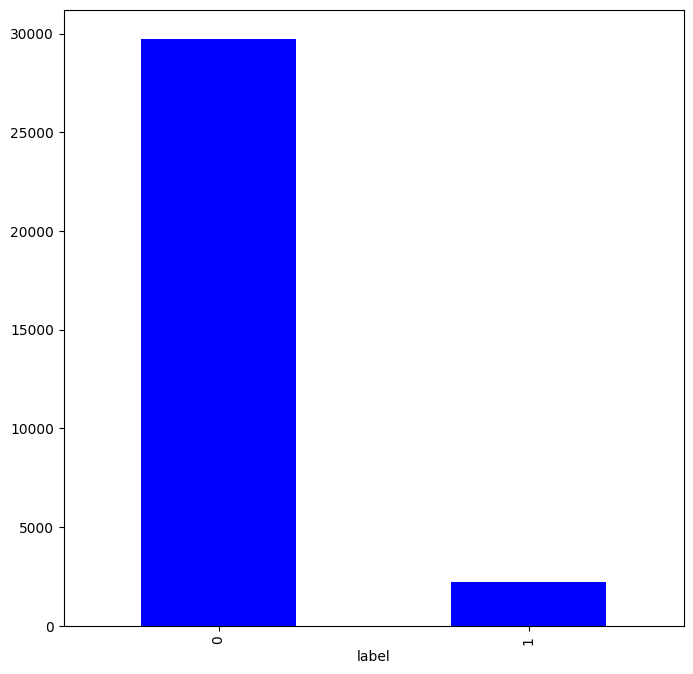

In [10]:
train_data['label'].value_counts().plot.bar(color = 'blue' , figsize=(8,8))

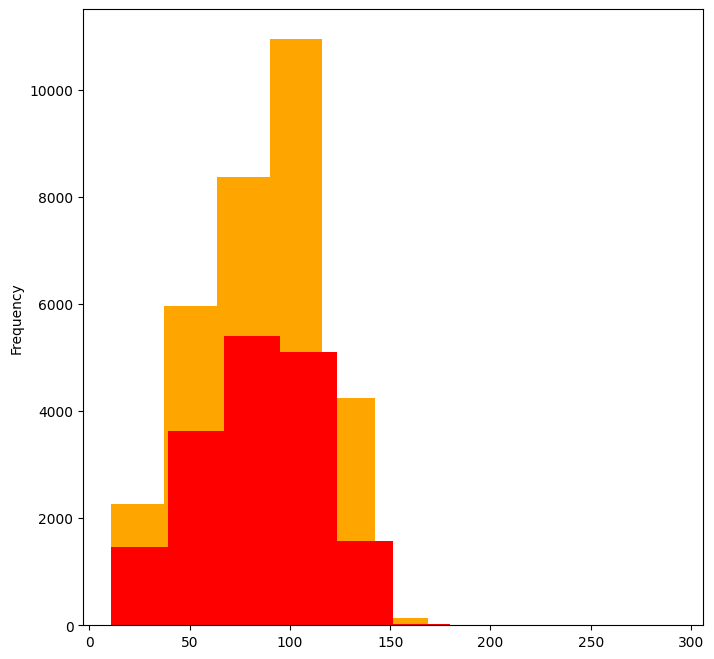

In [11]:
# checking the distribution of tweets in the data

length_train = train_data['tweet'].str.len().plot.hist(color = 'orange' , figsize = (8,8))
length_test = test_data['tweet'].str.len().plot.hist(color = 'red' , figsize = (8,8))

In [12]:
# add column to represent the length of the tweets
train_data['length'] = train_data['tweet'].str.len()
test_data['length']  = test_data['tweet'].str.len()

In [13]:
train_data.head()

,id,label,tweet,length
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39


In [14]:
test_data.head()

,id,tweet,length
0,31963,#studiolife #aislife #requires #passion #dedic...,90
1,31964,@user #white #supremacists want everyone to s...,101
2,31965,safe ways to heal your #acne!! #altwaystohe...,71
3,31966,is the hp and the cursed child book up for res...,142
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",93


In [15]:
train_data.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                 length                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

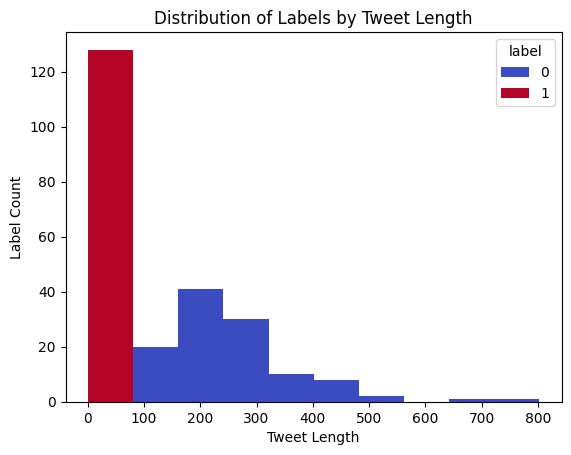

In [27]:
label_counts = train_data.groupby('length')['label'].value_counts().unstack()
label_counts.plot.hist(colormap='coolwarm')  # Adjust colormap as desired
plt.title('Distribution of Labels by Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Label Count')
plt.show()


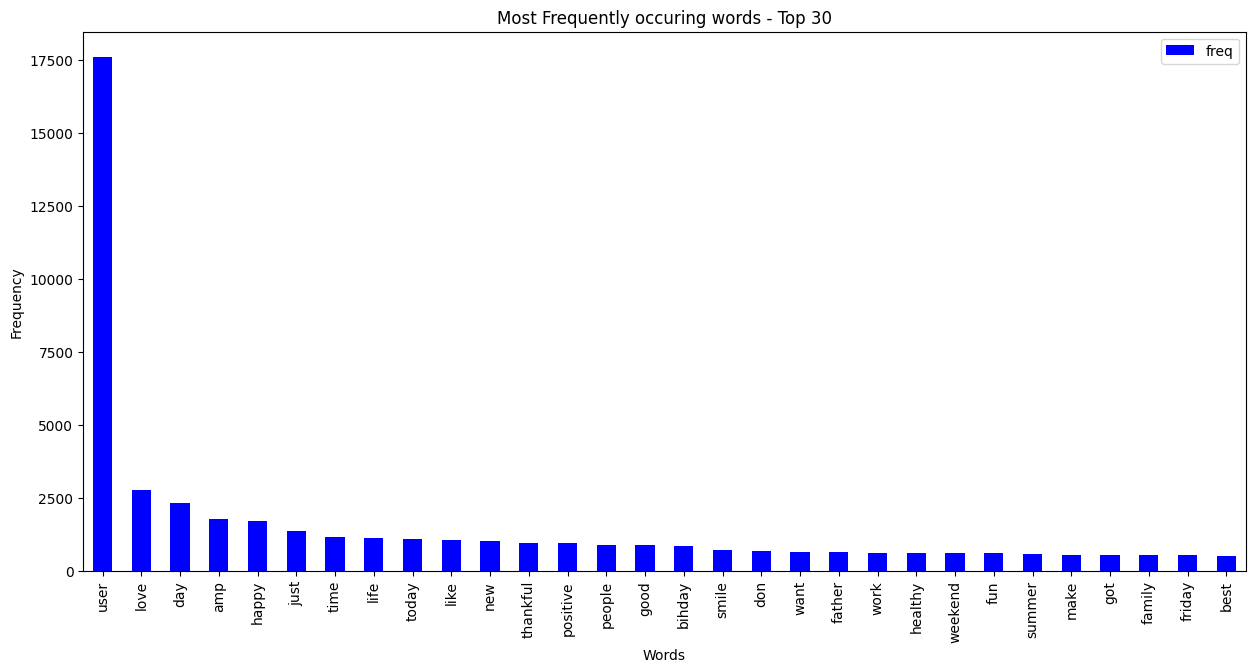

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.tweet)

sum_words = words.sum(axis = 0)

words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15,7), color= "blue")
plt.title("Most Frequently occuring words - Top 30")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [29]:
pip install wordcloud


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

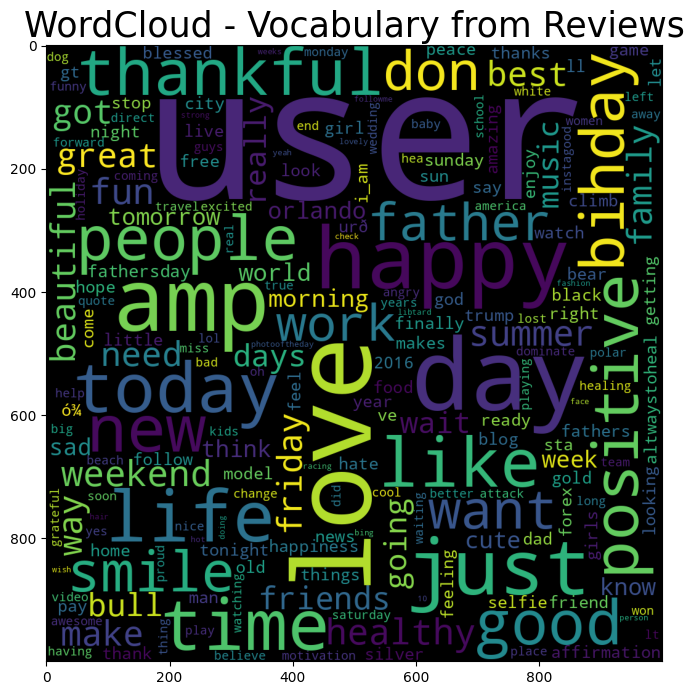

In [30]:
from wordcloud import WordCloud

WordCloud = WordCloud(background_color = 'black', width = 1000, height= 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(WordCloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize= 25)


In [31]:
# collecting the hashtags
import regex as re

def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [32]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train_data['tweet'][train_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_data['tweet'][train_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

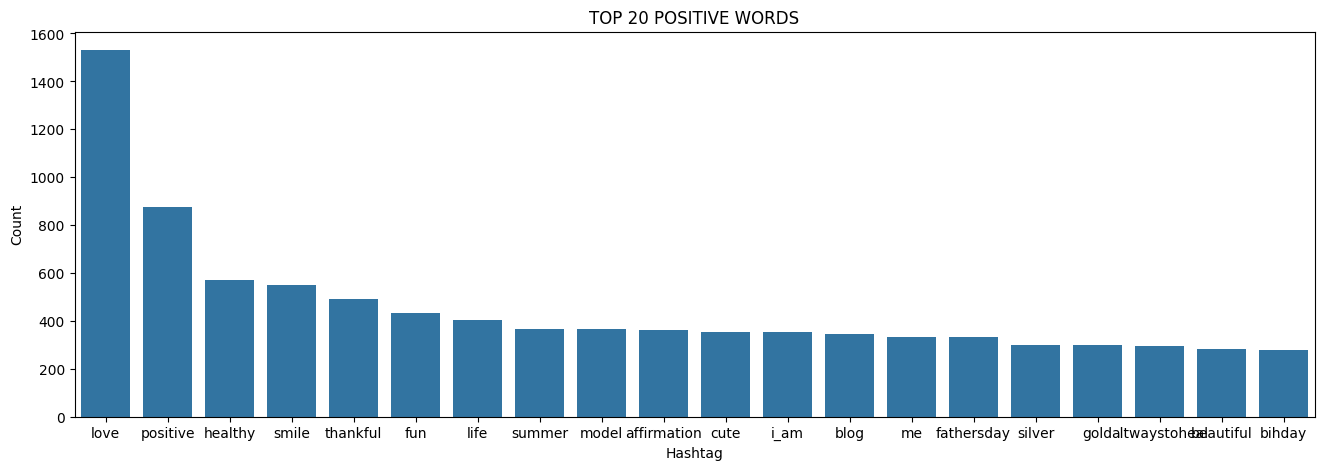

In [33]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("TOP 20 POSITIVE WORDS")
plt.show()


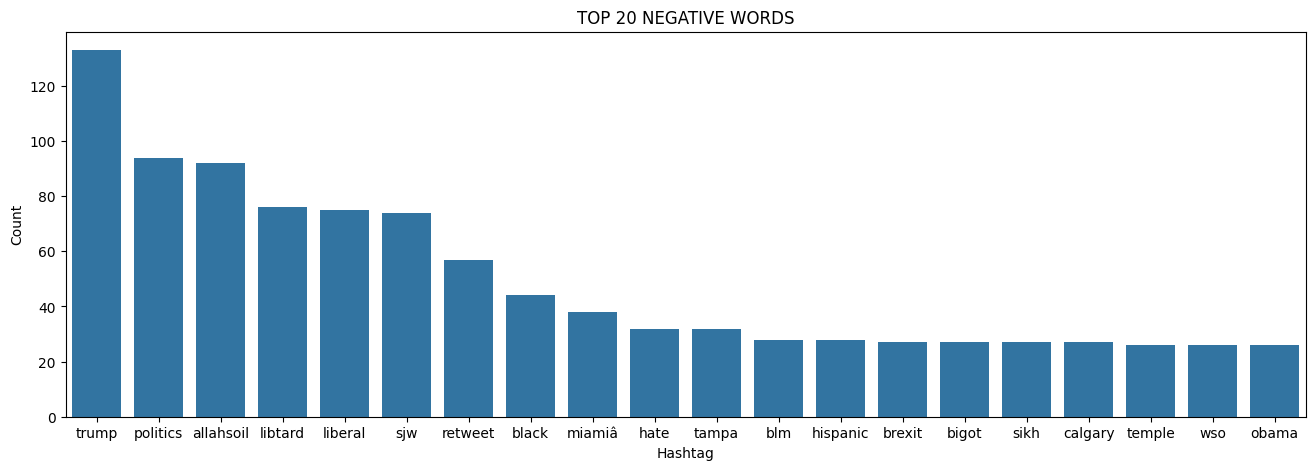

In [34]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("TOP 20 NEGATIVE WORDS")
plt.show()

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train_data['tweet'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34,
            alpha=0.025)

model_w2v.train(tokenized_tweet, total_examples= len(train_data['tweet']), epochs=20)

In [39]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.6567983031272888),
 ('#prosecco', 0.6012027859687805),
 ('coaching', 0.5906520485877991),
 ('podium', 0.5863235592842102),
 ('7!', 0.585584282875061),
 ('bay.', 0.5837205052375793),
 ('shopping!', 0.5832995772361755),
 ('sister!!', 0.5790412425994873),
 ('crackers', 0.5763543248176575),
 ('fluffy', 0.57618647813797)]

In [40]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7198414206504822),
 ('#merica', 0.7101805806159973),
 ('ownership', 0.709900975227356),
 ('aol', 0.6979782581329346),
 ('clubs', 0.6947464346885681),
 ('oâ\x80¦', 0.6940438151359558),
 ('britain', 0.6884040832519531),
 ('ways.', 0.6879035234451294),
 ('tolerance', 0.6878148317337036),
 ('#survivor', 0.6865871548652649)]

In [41]:
model_w2v.wv.most_similar(positive = "apple")

[('"mytraining"', 0.7029838562011719),
 ('mytraining', 0.6996647715568542),
 ('training"', 0.6785585880279541),
 ('app,', 0.6275907158851624),
 ('ta', 0.6034051179885864),
 ('"my', 0.5958957672119141),
 ('app', 0.5840411186218262),
 ('ios', 0.5796972513198853),
 ("domino's", 0.5740732550621033),
 ('humans.', 0.5622784495353699)]

In [42]:
model_w2v.wv.most_similar(negative = "apple")

[('#sunshine', 0.0912528857588768),
 ('#instalike', 0.06813226640224457),
 ('#sunny', 0.05093738064169884),
 ('united', 0.03428460657596588),
 ('#thursday', 0.022813597694039345),
 ('little', 0.018041623756289482),
 ('s', 0.013324679806828499),
 ('gorilla', 0.013190862722694874),
 ('#kitty', 0.009948357939720154),
 ('#black', 0.007981933653354645)]

In [43]:
model_w2v.wv.most_similar(negative= "hate")

[('#staup', 0.039040639996528625),
 ('#foodie', 0.025597136467695236),
 ('#community', 0.023550808429718018),
 ('#hungry', 0.02220951020717621),
 ('â\x9c\x88ï¸\x8f', 0.022042253986001015),
 ('#tgif', 0.018183616921305656),
 ('#inlove', 0.011985930614173412),
 ('street,', 0.004693533759564161),
 ('@', 0.002500774571672082),
 ('#bus', -0.0024035328533500433)]

In [ ]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [45]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train_data['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [46]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test_data['tweet'][i])
  review = review.lower()
  review = review.split()

  ps = PorterStemmer()

  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [47]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train_data.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [48]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


## Standardization

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

## Model Training
## RandonForestClassifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9516956576148167
F1 score : 0.6020618556701032
[[7313  119]
 [ 267  292]]


## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9851070042968587
Validation Accuracy : 0.9416843949443123
f1 score : 0.5926573426573427
[[7186  246]
 [ 220  339]]


## Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9319234138405706
f1 score : 0.5358361774744027
[[7133  299]
 [ 245  314]]


- By - Ritvik Jain
- Stevens Institute of Technology